# 5. Complex Networks and Generative Models

## 5.1 Introduction
Many real-world systems—social media, the internet, protein interaction networks, transportation grids—can be represented as **complex networks**. These networks are not purely random; they often display characteristic patterns such as **small-world** effects or **scale-free** degree distributions.  
Generative models aim to reproduce these structures by simulating how such networks might have formed.

---

## 5.2 Small-world Networks

### Definition
A **small-world network** has:
1. **High clustering coefficient** (*like regular lattices*).
2. **Short average path length** (*like random graphs*).

Formally:
- Let $ G = (V, E) $ with $ n = |V| $ and $ m = |E| $.
- **Clustering coefficient** for a node $ v $ is:
$$
C_v = \frac{2 \cdot |\{(u,w) \in E \;|\; u, w \in N(v)\}|}{k_v (k_v - 1)}
$$
where $ k_v $ is the degree of $ v $ and $ N(v) $ is its neighbor set.

- **Average clustering coefficient**:
$$
\overline{C} = \frac{1}{n} \sum_{v \in V} C_v
$$

- **Average path length**:
$$
L = \frac{1}{n(n-1)} \sum_{u \neq v} d(u,v)
$$
where $ d(u,v) $ is the shortest path distance.

**Small-world property**:  
$$
\overline{C} \gg C_{\text{random}}, \quad L \approx L_{\text{random}}
$$

### Watts–Strogatz Model (WS Model)
1. Start with a regular ring lattice where each node is connected to its $ k$ nearest neighbors.
2. With probability $ p$, rewire each edge to a randomly chosen node.

Parameters:
- $n $: number of nodes
- $ k$: mean degree
- $ p$: rewiring probability

This process preserves high clustering (for small $ p $) but drastically reduces $ L $, producing the small-world effect.

---

## 5.3 Scale-free Networks

### Definition
A network is **scale-free** if its degree distribution follows a **power law**:
$$
P(k) \sim k^{-\gamma}
$$
with $ 2 < \gamma < 3 $ in most empirical networks.

**Interpretation:**  
Most nodes have few connections, but a small number of nodes (**hubs**) have extremely high degree.

### Statistical Properties
- **Heavy-tailed distribution**: Probability of large degrees decays slowly.
- **Robustness**: Resistant to random node failures but vulnerable to targeted attacks on hubs.

---

## 5.4 Erdős–Rényi Random Graph Model $ G(n, p) $

### Model Definition
Given:
- $ n $ nodes
- Each possible edge is included **independently** with probability $ p$

**Number of possible edges**:
$$
M = \binom{n}{2}
$$

**Degree distribution**:
$$
P(k) = \binom{n-1}{k} p^k (1-p)^{n-1-k}
$$
For large \( n \), this approximates a Poisson distribution:
$$
P(k) \approx \frac{\lambda^k e^{-\lambda}}{k!}, \quad \lambda = p(n-1)
$$

**Average degree**:
$$
\langle k \rangle = p (n-1)
$$

**Phase transition**:  
A giant connected component emerges when:
$$
p_c = \frac{1}{n}
$$

---

## 5.5 Barabási–Albert (BA) Preferential Attachment Model

### Idea
Networks grow over time, and new nodes prefer to connect to already well-connected nodes.

### Algorithm
1. Start with a small connected network of $ m_0 $ nodes.
2. At each step, add a new node with $ m \le m_0 $ edges.
3. **Attachment probability** for existing node $ i $:
$$
\Pi(k_i) = \frac{k_i}{\sum_{j} k_j}
$$
where $ k_i $ is the current degree of node $ i $.

### Properties
- Produces a power-law degree distribution with:
$$
P(k) \sim k^{-3}
$$
- Captures the **rich-get-richer** phenomenon.

---

## 5.6 Comparison of Models

| Model                | Degree Distribution   | Clustering | Path Length | Main Feature |
|----------------------|----------------------|------------|-------------|--------------|
| Erdős–Rényi          | Poisson              | Low        | Short       | Randomness   |
| Watts–Strogatz       | Narrow (like lattice)| High       | Short       | Small-world  |
| Barabási–Albert      | Power law            | Low–Medium | Short       | Scale-free   |

---

## 5.7 Applications
- **Epidemiology**: Predicting disease spread in social contact networks.
- **Web Science**: Modeling hyperlink structure of the WWW.
- **Biology**: Protein-protein interaction networks.
- **Infrastructure**: Power grid resilience analysis.

---

## 5.8 References
- Watts, D. J., & Strogatz, S. H. (1998). *Collective dynamics of 'small-world' networks*. Nature.
- Barabási, A.-L., & Albert, R. (1999). *Emergence of scaling in random networks*. Science.
- Erdős, P., & Rényi, A. (1959). *On Random Graphs*. Publicationes Mathematicae.




--- Network Models Summary ---

Erdős–Rényi (Random Graph):
  Nodes                    : 500
  Edges                    : 2437
  Avg Degree               : 9.7480
  Degree Std               : 3.0319
  Avg Clustering           : 0.0161
  Transitivity             : 0.0166
  Avg Shortest Path (GCC)  : 2.9674
  Fraction Nodes in GCC    : 1.0000
  Estimated power-law exponent (gamma) from tail: 1.5496 (k_min=2, tail size=500)

Watts–Strogatz (Small-world):
  Nodes                    : 500
  Edges                    : 1500
  Avg Degree               : 6.0000
  Degree Std               : 0.5367
  Avg Clustering           : 0.5279
  Transitivity             : 0.5194
  Avg Shortest Path (GCC)  : 6.9900
  Fraction Nodes in GCC    : 1.0000
  Estimated power-law exponent (gamma) from tail: 1.7235 (k_min=2, tail size=500)

Barabási–Albert (Scale-free):
  Nodes                    : 500
  Edges                    : 1491
  Avg Degree               : 5.9640
  Degree Std               : 6.8521
  Avg Cl

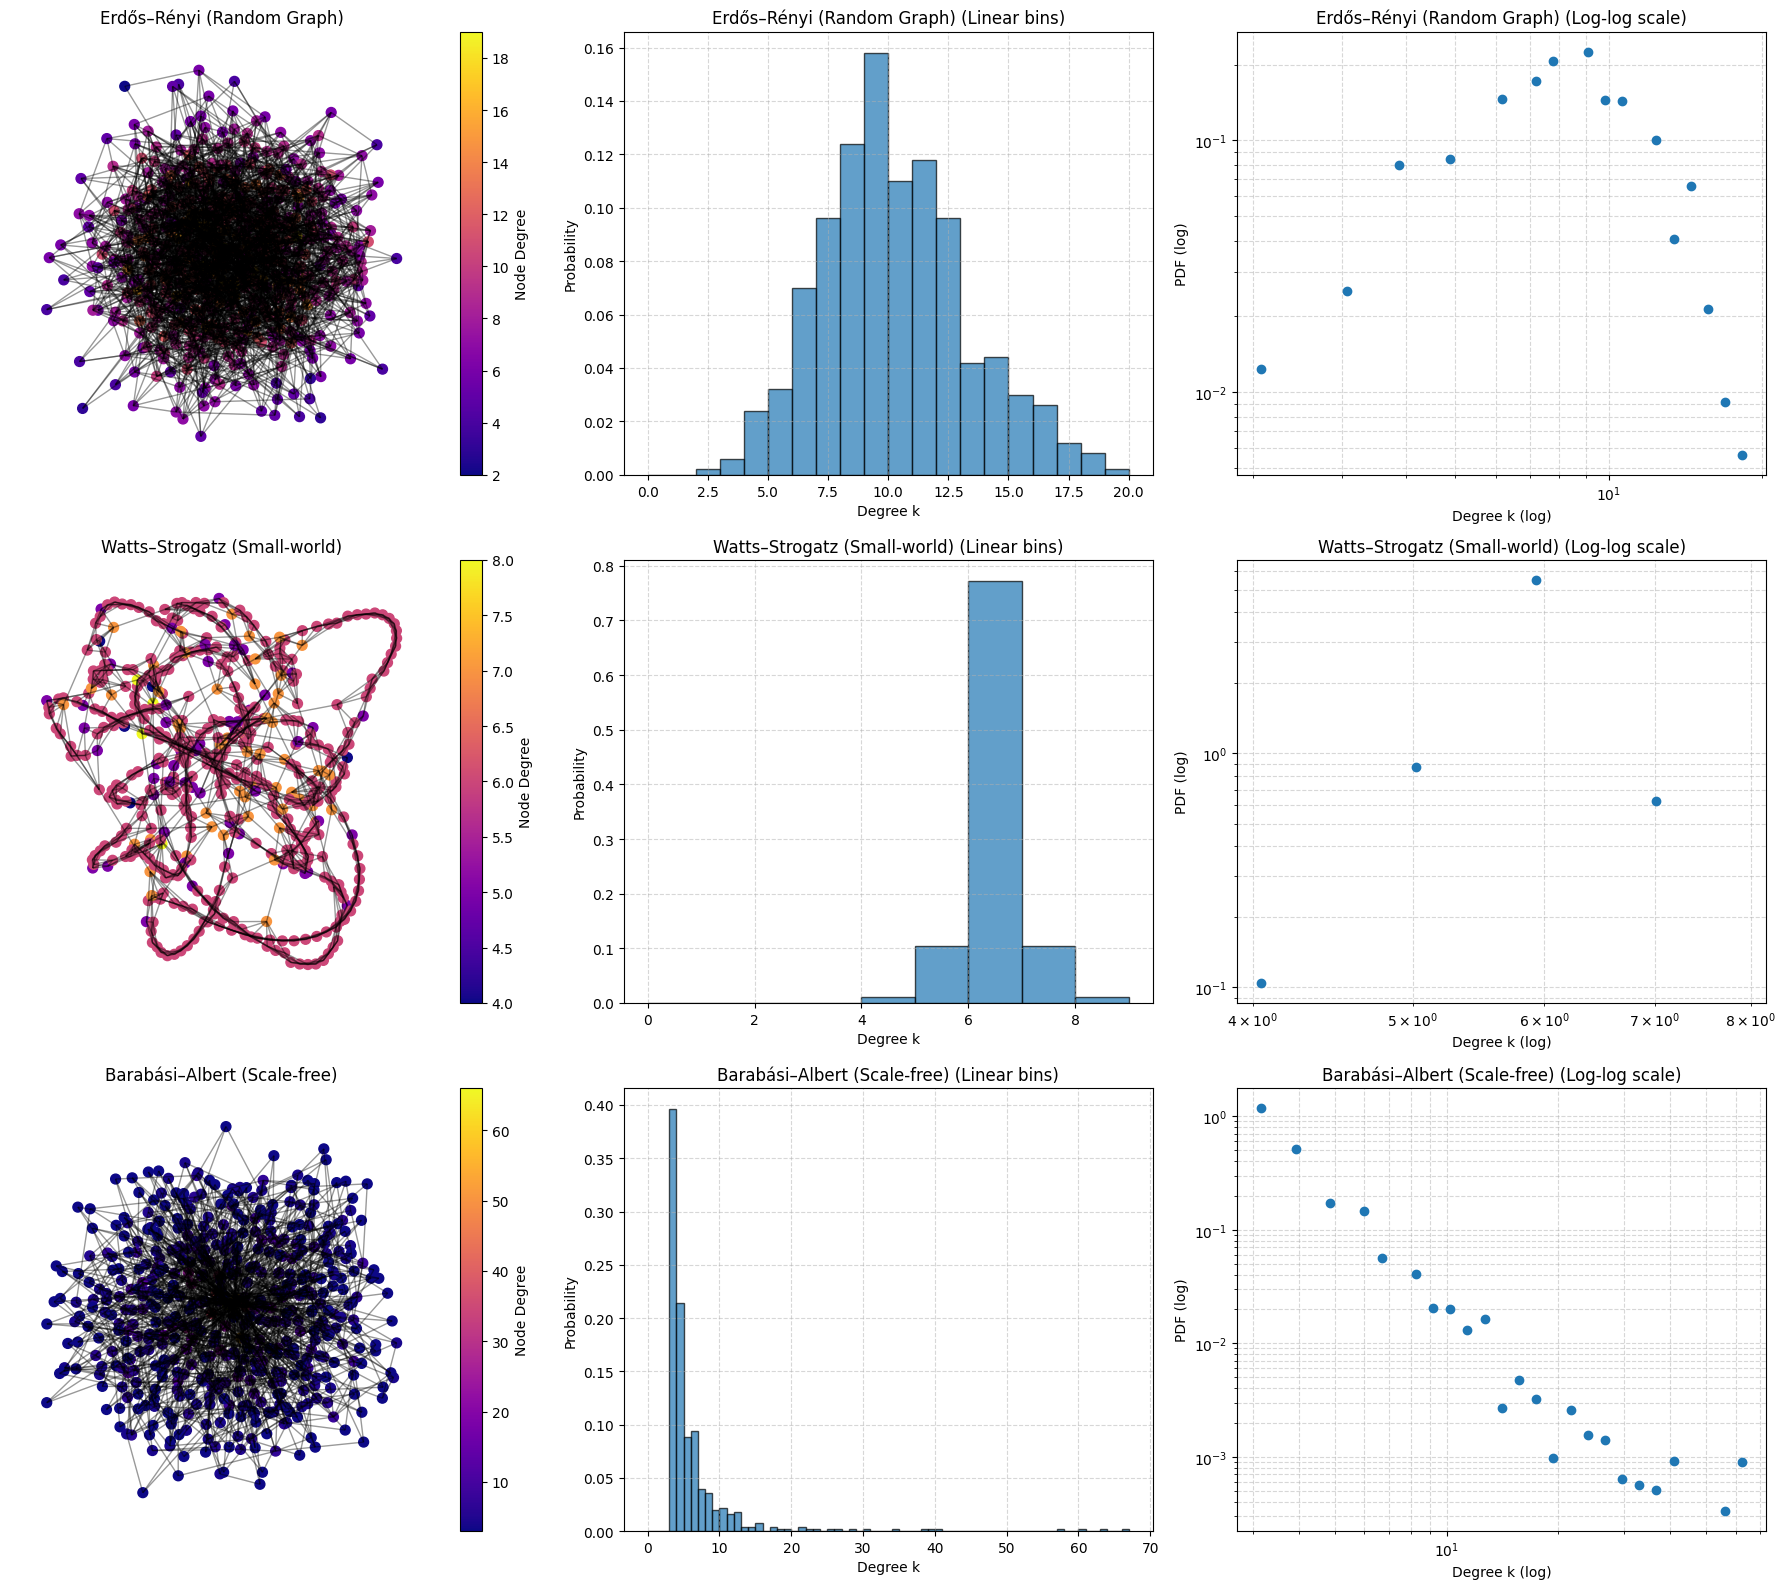

In [1]:
"""
graph_models_for_lecture.py

Generate, visualize, and analyze three fundamental complex network models:
- Erdős–Rényi (Random graph)
- Watts–Strogatz (Small-world)
- Barabási–Albert (Scale-free)

Fully compatible with Python 3.13 and NumPy 2.0+.

Required packages:
- networkx
- numpy
- matplotlib
- scipy

Install with:
pip install networkx numpy matplotlib scipy
"""

# --- Compatibility patch for NumPy 2.0+ ---
import numpy as np
if not hasattr(np, "float_"):
    np.float_ = np.float64
if not hasattr(np, "int_"):
    np.int_ = np.int64

import networkx as nx
import matplotlib.pyplot as plt

# --- Utility Functions ---

def largest_connected_subgraph(G):
    """
    Returns the largest connected component of graph G as a subgraph.
    Ensures computations like average shortest path length are valid.
    """
    if nx.is_connected(G):
        return G
    components = list(nx.connected_components(G))
    largest_comp = max(components, key=len)
    return G.subgraph(largest_comp).copy()

def safe_average_shortest_path_length(G):
    """
    Computes average shortest path length on the largest connected component (GCC).
    Returns np.nan if the graph is empty or too small.
    """
    if G.number_of_nodes() == 0:
        return np.nan
    GCC = largest_connected_subgraph(G)
    if GCC.number_of_nodes() <= 1:
        return 0.0
    return nx.average_shortest_path_length(GCC)

def degree_distribution(G):
    """
    Returns an array of node degrees.
    """
    return np.array([d for _, d in G.degree()])

def log_binned_histogram(degrees, bins=30):
    """
    Computes histogram on log-spaced bins for degree distribution visualization.
    Returns bin centers and normalized PDF values.
    """
    degrees = degrees[degrees > 0]  # exclude zeros to avoid log(0)
    if len(degrees) == 0:
        return np.array([]), np.array([])
    min_deg, max_deg = degrees.min(), degrees.max()
    log_bins = np.logspace(np.log10(max(1, min_deg)), np.log10(max_deg), bins)
    counts, edges = np.histogram(degrees, bins=log_bins)
    centers = np.sqrt(edges[:-1] * edges[1:])
    pdf = counts / (counts.sum() * np.diff(edges))
    return centers, pdf

def estimate_power_law_exponent(degrees, k_min=2):
    """
    Estimates the power-law exponent (gamma) for the degree distribution tail.
    Uses continuous MLE approximation from Clauset et al. (2009).
    Returns (gamma_hat, k_min_used, tail_size).
    """
    tail = degrees[degrees >= k_min]
    n = len(tail)
    if n < 2:
        return np.nan, k_min, n
    denom = np.sum(np.log(tail / (k_min - 0.5)))
    gamma_hat = 1.0 + n / denom
    return gamma_hat, k_min, n

def graph_summary_stats(G):
    """
    Computes key metrics for graph G:
    - number of nodes & edges
    - average degree & degree std
    - average clustering coefficient & transitivity
    - average shortest path length (on largest connected component)
    - fraction of nodes in largest connected component
    """
    degs = degree_distribution(G)
    n_nodes = G.number_of_nodes()
    GCC = largest_connected_subgraph(G)
    frac_in_GCC = len(GCC) / max(1, n_nodes)

    stats = {
        "Nodes": n_nodes,
        "Edges": G.number_of_edges(),
        "Avg Degree": float(np.mean(degs)) if len(degs) > 0 else 0.0,
        "Degree Std": float(np.std(degs)) if len(degs) > 0 else 0.0,
        "Avg Clustering": nx.average_clustering(G),
        "Transitivity": nx.transitivity(G),
        "Avg Shortest Path (GCC)": safe_average_shortest_path_length(G),
        "Fraction Nodes in GCC": frac_in_GCC,
    }
    return stats

# --- Graph Model Generators ---

def generate_erdos_renyi(n, p, seed=None):
    """
    Generates an Erdős–Rényi random graph G(n, p)
    """
    return nx.erdos_renyi_graph(n, p, seed=seed)

def generate_watts_strogatz(n, k, p_rewire, seed=None):
    """
    Generates a Watts–Strogatz small-world graph
    """
    return nx.watts_strogatz_graph(n, k, p_rewire, seed=seed)

def generate_barabasi_albert(n, m, seed=None):
    """
    Generates a Barabási–Albert scale-free graph
    """
    return nx.barabasi_albert_graph(n, m, seed=seed)

# --- Visualization Functions ---

def plot_graph(G, title='', ax=None, node_size=50):
    """
    Plots the graph using spring layout, coloring nodes by degree.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
    degrees = dict(G.degree())
    pos = nx.spring_layout(G, seed=42)
    nodes = ax.scatter([pos[n][0] for n in G.nodes()],
                       [pos[n][1] for n in G.nodes()],
                       c=list(degrees.values()),
                       cmap='plasma', s=node_size)
    nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax)
    ax.set_title(title)
    ax.axis('off')
    cbar = plt.colorbar(nodes, ax=ax)
    cbar.set_label('Node Degree')

def plot_degree_distribution(G, ax_linear=None, ax_log=None, nbins=30, title='Degree Distribution'):
    """
    Plots degree distribution in linear and log-log scale.
    """
    degs = degree_distribution(G)
    # Linear histogram
    if ax_linear is None or ax_log is None:
        fig, (ax_linear, ax_log) = plt.subplots(1, 2, figsize=(12, 4))
    ax_linear.hist(degs, bins=range(int(degs.max()) + 2), density=True, alpha=0.7, edgecolor='black')
    ax_linear.set_xlabel('Degree k')
    ax_linear.set_ylabel('Probability')
    ax_linear.set_title(title + ' (Linear bins)')
    ax_linear.grid(True, linestyle='--', alpha=0.5)

    # Log-binned histogram
    centers, pdf = log_binned_histogram(degs, bins=nbins)
    if len(centers) > 0:
        ax_log.loglog(centers, pdf, marker='o', linestyle='none')
    else:
        ax_log.text(0.5, 0.5, 'No positive degrees', transform=ax_log.transAxes, ha='center', va='center')
    ax_log.set_xlabel('Degree k (log)')
    ax_log.set_ylabel('PDF (log)')
    ax_log.set_title(title + ' (Log-log scale)')
    ax_log.grid(True, which='both', linestyle='--', alpha=0.5)

# --- Main Demo Function ---

def demo(n=500, er_p=0.02, ws_k=6, ws_p=0.05, ba_m=3, seed=42):
    np.random.seed(seed)

    G_er = generate_erdos_renyi(n, er_p, seed=seed)
    G_ws = generate_watts_strogatz(n, ws_k, ws_p, seed=seed)
    G_ba = generate_barabasi_albert(n, ba_m, seed=seed)

    fig, axes = plt.subplots(3, 3, figsize=(18, 16))  # 3 rows, 3 cols

    graph_data = [
        ("Erdős–Rényi (Random Graph)", G_er),
        ("Watts–Strogatz (Small-world)", G_ws),
        ("Barabási–Albert (Scale-free)", G_ba),
    ]

    print("\n--- Network Models Summary ---\n")

    for i, (name, G) in enumerate(graph_data):
        plot_graph(G, title=name, ax=axes[i, 0])
        plot_degree_distribution(G, ax_linear=axes[i, 1], ax_log=axes[i, 2], title=name)

        stats = graph_summary_stats(G)
        degs = degree_distribution(G)
        gamma_hat, k_min, tail_size = estimate_power_law_exponent(degs, k_min=2)

        print(f"{name}:")
        for key, val in stats.items():
            print(f"  {key:25}: {val:.4f}" if isinstance(val, float) else f"  {key:25}: {val}")
        print(f"  Estimated power-law exponent (gamma) from tail: {gamma_hat:.4f} (k_min={k_min}, tail size={tail_size})\n")

    plt.tight_layout()
    plt.show()


# --- Run demo when executed as script ---
if __name__ == "__main__":
    demo()
